In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The simplest pandas data structure: pd.Series

In [2]:
# Create sample pandas series
names = ['Manabe','Hasselmann','Parisi']
values = [90, 89, 73]

ages = pd.Series(values, index=names)

In [3]:
type(ages)

pandas.core.series.Series

In [4]:
ages

Manabe        90
Hasselmann    89
Parisi        73
dtype: int64

<AxesSubplot:>

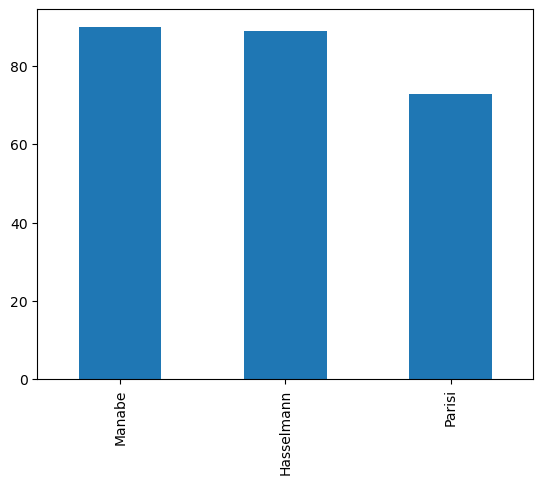

In [5]:
ages.plot(kind='bar')

In [6]:
# Can do math operations
np.log(ages) # log de-emphasize differences

Manabe        4.499810
Hasselmann    4.488636
Parisi        4.290459
dtype: float64

In [7]:
np.exp(ages) # exp emphasize dofferences

Manabe        1.220403e+39
Hasselmann    4.489613e+38
Parisi        5.052394e+31
dtype: float64

In [8]:
# You can also pass a dict to pd.Series
ages_dict = {'Manabe': 90, 'Hasselmann': 89, 'Parisi': 73}
type(ages_dict)

dict

In [9]:
ages = pd.Series(ages_dict)

In [10]:
ages.loc['Hasselmann'] # loc selects value

89

In [11]:
# ages.iloc[1] 

In [12]:
ages.index

Index(['Manabe', 'Hasselmann', 'Parisi'], dtype='object')

In [13]:
ages.values

array([90, 89, 73])

# Dataframes: the pandas structure for tabular data

In [14]:
data = {'age': [90,89,73],
        'nationality': ['Japanese-American','German','Italian'],
        'field': ['climate science', 'oceanography and climate science', 'physics of complex systems'],
        'prize-share': [1/4,1/4,1/2],
}
type(data)

dict

In [15]:
data['age']

[90, 89, 73]

In [16]:
laureates = pd.DataFrame(data, index=['Manabe','Hasselmann','Parisi'])

In [17]:
type(laureates)

pandas.core.frame.DataFrame

In [18]:
laureates

,age,nationality,field,prize-share
Manabe,90,Japanese-American,climate science,0.25
Hasselmann,89,German,oceanography and climate science,0.25
Parisi,73,Italian,physics of complex systems,0.50


In [19]:
laureates.min()

age                         73
nationality             German
field          climate science
prize-share               0.25
dtype: object

In [20]:
type(laureates['age'])

pandas.core.series.Series

# Pandas is great for dealing with time

In [21]:
time = pd.date_range('10/1/2021',periods=150,freq='S')

In [22]:
time

DatetimeIndex(['2021-10-01 00:00:00', '2021-10-01 00:00:01',
               '2021-10-01 00:00:02', '2021-10-01 00:00:03',
               '2021-10-01 00:00:04', '2021-10-01 00:00:05',
               '2021-10-01 00:00:06', '2021-10-01 00:00:07',
               '2021-10-01 00:00:08', '2021-10-01 00:00:09',
               ...
               '2021-10-01 00:02:20', '2021-10-01 00:02:21',
               '2021-10-01 00:02:22', '2021-10-01 00:02:23',
               '2021-10-01 00:02:24', '2021-10-01 00:02:25',
               '2021-10-01 00:02:26', '2021-10-01 00:02:27',
               '2021-10-01 00:02:28', '2021-10-01 00:02:29'],
              dtype='datetime64[ns]', length=150, freq='S')

# Loading some tabular data

In [23]:
!cp /shared/marn5895/data/NOAA_Sealevel_Falmouth.csv .

cp: /shared/marn5895/data/NOAA_Sealevel_Falmouth.csv: No such file or directory


In [25]:
!head -n 10 NOAA.csv

Monthly mean sea levels with the average seasonal cycle removed.
The values are in meters relative to the most recent Mean Sea Level datum established by CO-OPS.
Column values are the Year; Month; Monthly Mean; Relative Sea Level Trend Line; Higher 95% Confidence Interval; and Lower 95% Confidence Interval.
Product of NOAAs National Ocean Service / Center for Operational Oceanographic Products and Services (CO-OPS)

Year, Month, Monthly_MSL, Linear_Trend, High_Conf., Low_Conf.
1954,3,6.829,6.825,6.844,6.807,
1954,4,6.769,6.825,6.844,6.807,
1954,5,6.871,6.826,6.844,6.807,
1954,6,6.809,6.826,6.845,6.808,


In [40]:
df = pd.read_csv('NOAA_Sealevel_Falmouth.csv')

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft)
0,2021/08/01,00:00,1.160,-,1.54
1,2021/08/01,00:06,1.131,-,1.49
2,2021/08/01,00:12,1.103,-,1.47
3,2021/08/01,00:18,1.076,-,1.45
4,2021/08/01,00:24,1.049,-,1.41
...,...,...,...,...,...
7435,2021/08/31,23:30,1.619,-,2.36
7436,2021/08/31,23:36,1.610,-,2.33
7437,2021/08/31,23:42,1.597,-,2.33
7438,2021/08/31,23:48,1.582,-,2.32


In [44]:
time = pd.to_datetime(df['Date'] + ' ' + df['Time (GMT)'])

In [45]:
type(time)

pandas.core.series.Series

In [46]:
time

0      2021-08-01 00:00:00
1      2021-08-01 00:06:00
2      2021-08-01 00:12:00
3      2021-08-01 00:18:00
4      2021-08-01 00:24:00
               ...        
7435   2021-08-31 23:30:00
7436   2021-08-31 23:36:00
7437   2021-08-31 23:42:00
7438   2021-08-31 23:48:00
7439   2021-08-31 23:54:00
Length: 7440, dtype: datetime64[ns]

In [47]:
df = df.set_index(time)

In [48]:
df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft)
2021-08-01 00:00:00,2021/08/01,00:00,1.160,-,1.54
2021-08-01 00:06:00,2021/08/01,00:06,1.131,-,1.49
2021-08-01 00:12:00,2021/08/01,00:12,1.103,-,1.47
2021-08-01 00:18:00,2021/08/01,00:18,1.076,-,1.45
2021-08-01 00:24:00,2021/08/01,00:24,1.049,-,1.41
...,...,...,...,...,...
2021-08-31 23:30:00,2021/08/31,23:30,1.619,-,2.36
2021-08-31 23:36:00,2021/08/31,23:36,1.610,-,2.33
2021-08-31 23:42:00,2021/08/31,23:42,1.597,-,2.33
2021-08-31 23:48:00,2021/08/31,23:48,1.582,-,2.32


In [49]:
df.describe()

,Predicted (ft),Verified (ft)
count,7440.000000,7440.000000
mean,1.146276,1.596333
std,0.638920,0.640214
min,-0.131000,0.340000
25%,0.675000,1.090000
50%,1.038000,1.510000
75%,1.626000,2.040000
max,2.841000,3.670000


In [50]:
df['Predicted (ft)'].mean()

1.1462759408602152

# Built-in plotting

Text(0, 0.5, 'Sea level (ft)')

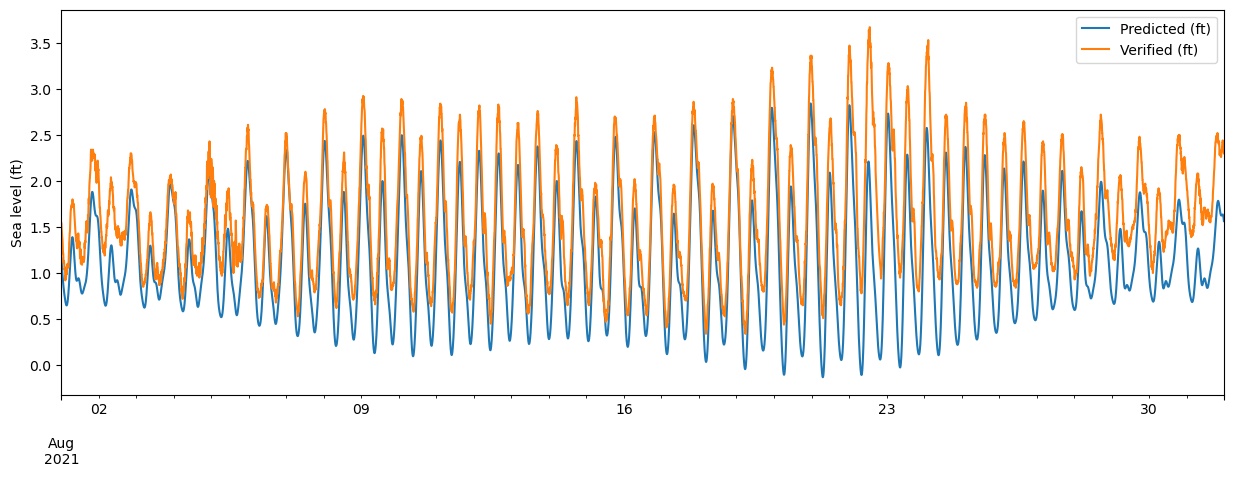

In [51]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)

df.plot(y='Predicted (ft)',ax=ax1)
df.plot(y='Verified (ft)',ax=ax1)

ax1.set_ylabel('Sea level (ft)')

# Assign new column

In [52]:
df['Storm Surge (ft)'] = df['Verified (ft)']-df['Predicted (ft)']

In [53]:
df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft),Storm Surge (ft)
2021-08-01 00:00:00,2021/08/01,00:00,1.160,-,1.54,0.380
2021-08-01 00:06:00,2021/08/01,00:06,1.131,-,1.49,0.359
2021-08-01 00:12:00,2021/08/01,00:12,1.103,-,1.47,0.367
2021-08-01 00:18:00,2021/08/01,00:18,1.076,-,1.45,0.374
2021-08-01 00:24:00,2021/08/01,00:24,1.049,-,1.41,0.361
...,...,...,...,...,...,...
2021-08-31 23:30:00,2021/08/31,23:30,1.619,-,2.36,0.741
2021-08-31 23:36:00,2021/08/31,23:36,1.610,-,2.33,0.720
2021-08-31 23:42:00,2021/08/31,23:42,1.597,-,2.33,0.733
2021-08-31 23:48:00,2021/08/31,23:48,1.582,-,2.32,0.738


Text(0, 0.5, 'Sea level (ft)')

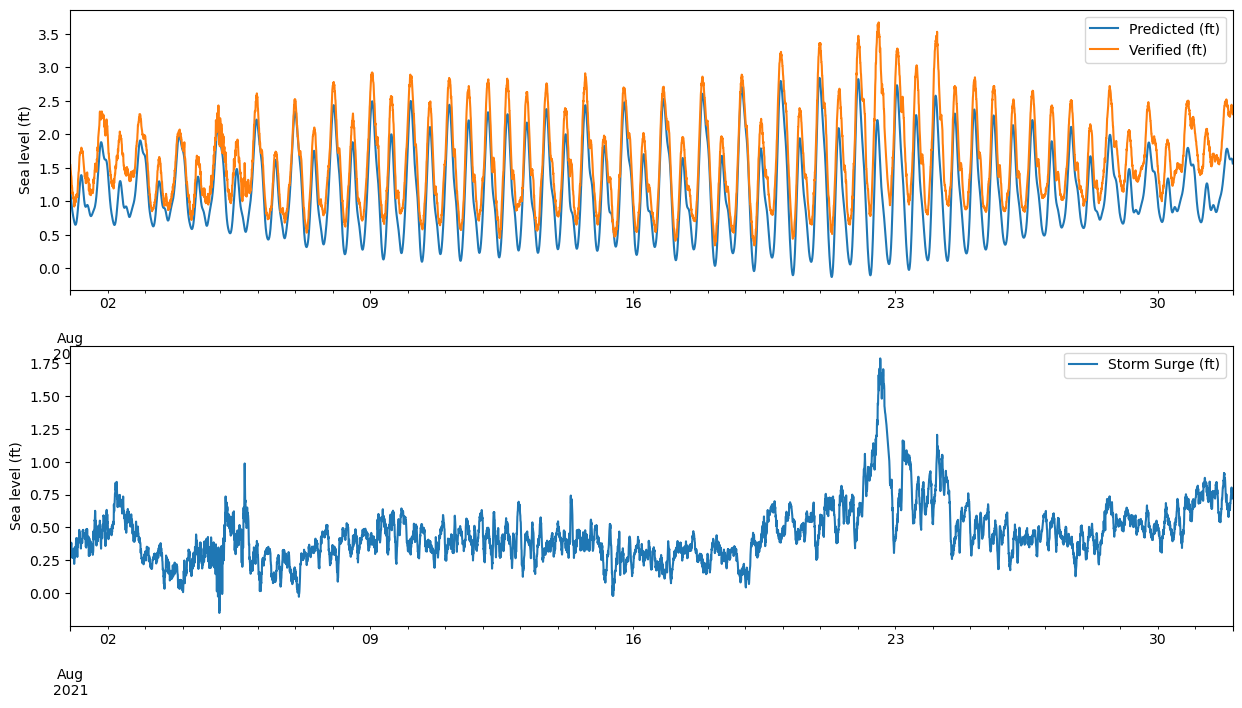

In [54]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(2,1,1)

df.plot(y='Predicted (ft)',ax=ax1)
df.plot(y='Verified (ft)',ax=ax1)
ax1.set_ylabel('Sea level (ft)')

ax2 = fig.add_subplot(2,1,2)
df.plot(y='Storm Surge (ft)',ax=ax2)
ax2.set_ylabel('Sea level (ft)')

Text(0.5, 0, 'Storm surge (ft)')

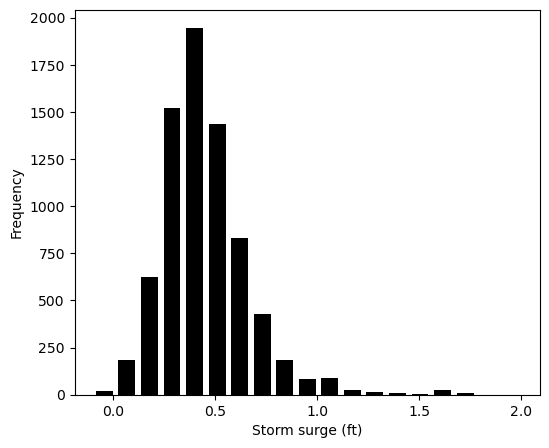

In [55]:
fig = plt.figure(figsize=(6,5))

# a dictionary with figure properties
kwargs = dict(bins=np.linspace(-.1,2,20),
              color='k',
              rwidth=0.75,
)

ax1 = fig.add_subplot(111)

df['Storm Surge (ft)'].plot.hist(ax=ax1,**kwargs)
ax1.set_xlabel('Storm surge (ft)')

In [56]:
# We can easily do averaging/filtering operations with pandas, e.g. a daily rolling average: 
df_avg= df.resample('24H').mean()

/var/folders/x5/8ctctvjn7wdbg77nsqnlrhtr0000gn/T/ipykernel_13692/555867860.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg= df.resample('24H').mean()


<AxesSubplot:>

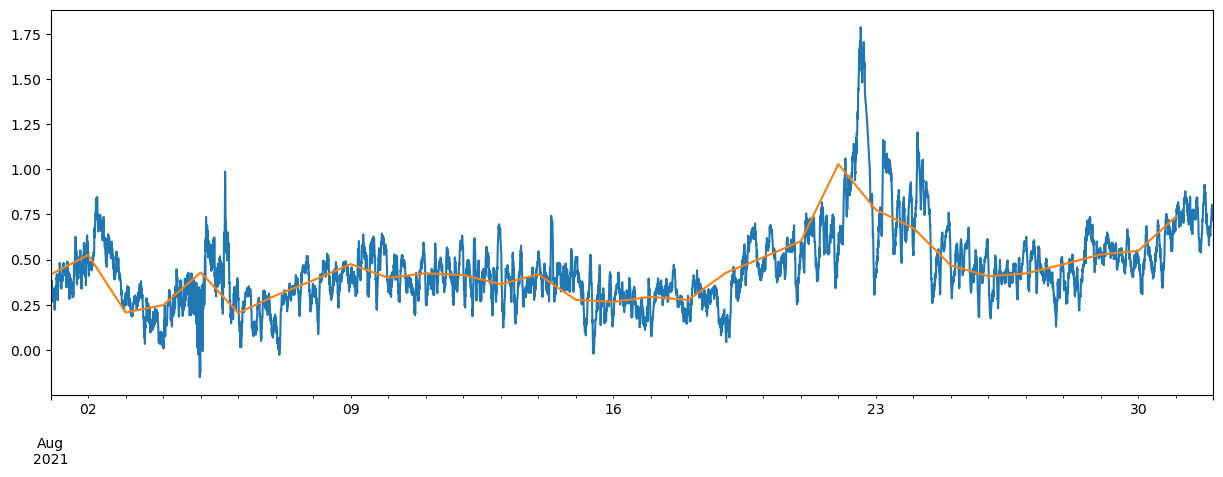

In [57]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
df['Storm Surge (ft)'].plot(ax=ax1)
df_avg['Storm Surge (ft)'].plot(ax=ax1)

In [60]:
# Save CSV files
df_avg.to_csv('StormSurge_Falmouth.csv')

In [63]:
# Excel formart 
# Note: if you get an error when you run this cell,
#       you should uninstall and then re-install openpyxl.
#.      On a code cell, you chould do:
#       !pip uninstall openpyxl
#       !pip install openpyxl
 
df_avg.to_excel('StormSurge_Falmouth.xlsx')

# Reading data directly from the Web 
You could of course download it with `wget`, but it's better to have pandas read the csv straight from the Web, 
so you don't have to download a new data file when the data are updated.
Here's how we do it with monthly Manua Loa Observatory CO2 data.

In [64]:
url = 'https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv'

In [65]:
mlo = pd.read_csv(url,sep=',')

In [66]:
mlo

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30


In [67]:
mlo.keys()

Index(['Date', 'Decimal Date', 'Average', 'Interpolated', 'Trend',
       'Number of Days'],
      dtype='object')

In [68]:
# Set the time as the index (it's a time series)
mlo = mlo.set_index(pd.to_datetime(mlo['Date']))

In [69]:
# Masking some bad data
mlo[mlo.Average<0] = np.nan

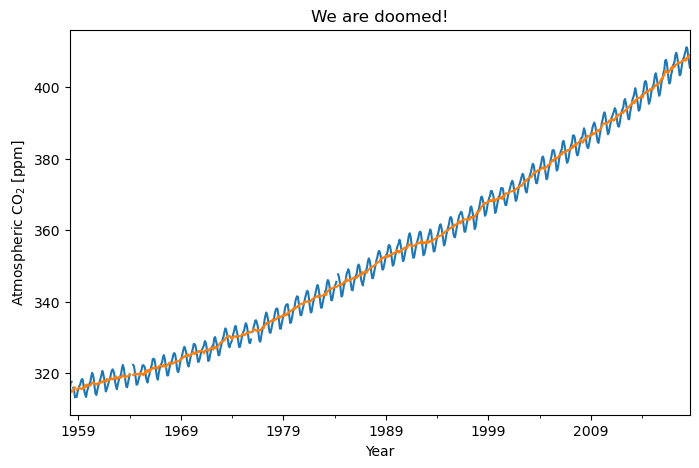

In [70]:
# Plotting the CO2 concentration: the iconic Keeling curve
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)

mlo.Average.plot(ax=ax1)
mlo.Trend.plot(ax=ax1)

ax1.set_ylabel('Atmospheric CO$_2$ [ppm]')
ax1.set_xlabel('Year')
ax1.set_title('We are doomed!')

fig.savefig('KeelingCurve.png',dpi=150, bbox_inches='tight')

In [74]:
# Let's code a simple function in python
# to find out what was the CO2 when we were born.
def BirthInPPM(year=1990,month=10):
    """ This function prints the CO2 concentration
        during the month and year you were born.
        
    Parameters:
        - year : int
        - month : int
        
    """

    your_ppm = mlo['Average'][(mlo.index.year == year) & 
                           (mlo.index.month == month)].values[0]
    
    print("You were born at", round(your_ppm), "ppm.")

In [75]:
# Now call the fuction, passing on parameters:
BirthInPPM(year=2003,month=10)

You were born at 373 ppm.
